<a href="https://colab.research.google.com/github/Eliasamuneke/Quickstart_lab/blob/main/labs/intro_to_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to SciKitLearn (sklearn)
#### Part of the [Inquiryum Machine Learning Fundamentals Course](http://inquiryum.com/machine-learning/)


![](https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg)


Scikit-learn (aka `sklearn`)
sklearn is a Python library that implements many machine learning algorithms. It uses Numpy for high performance matrix operations. 

The best bet, as with probably everything else, is just to google what you want. For example, if you want to learn how to use kNN (k nearest neighbors) with sklearn, google **sklearn knn**  and you will find the information. The good thing about sklearn documentation, is that they provide a short example of how to use each algorithm.

That said, let's get started.


### Women Athletes



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/rass.png)
<font size='0.85em'>(Credit: Aly Raisman/Instagram)</font> 

(Left to right: Liz Cambage (Australian Olympic Basksetball Team, Aly Raisman (U.S. Olympic Gymnast)

We are going to start with something that people find very easy: Based on height and weight, guessing what sport (basketball or gymnastics) an athlete plays at a world class level. Starting with a task that is super easy for us will allow us to focus more on the algorithm.

The dataset has contains three classes of 50 instances each:

1. Female Olympic Basketball Players
2. Female Olympic Gymnasts.
3. Female Professional Rugby Players.

We will restrict our initial exploration to Basketball Players and Gymnasts. 


There are only 2 attributes or features:

1. height in inches 
2. weight in pounds



The job of the classifier is to determine the class of an instance (the sport) based on the values of the attributes.

The data file is


```
https://raw.githubusercontent.com/zacharski/datamining-guide/main/data/womens_sports.csv
```
 Let's load it in

In [40]:
import pandas as pd
from pandas import DataFrame

athletes = pd.read_csv('https://raw.githubusercontent.com/zacharski/datamining-guide/main/data/womens_sports.csv')
athletes

,name,height_in,weight_lb,sport
0,Moeko Nagaoka,72,165,basketball
1,Maki Takada,72,168,basketball
2,Naho Miyoshi,65,141,basketball
3,Rui Machida,64,126,basketball
4,Nako Motohashi,65,121,basketball
...,...,...,...,...
145,Millie Boyle,71,183,rugby
146,Kezie Apps,72,181,rugby
147,Annette Brander,65,172,rugby
148,Hannah Southwell,68,165,rugby


Before we do anything else, let us graph out the data:

In [41]:
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3, Set2_3,brewer
bpl.output_notebook()
source = bpl.ColumnDataSource(athletes)

# use whatever palette you want...
palette = brewer['Dark2'][len(athletes['sport'].unique())]

color_map = bmo.CategoricalColorMapper(factors=athletes['sport'].unique(),
                                   palette=palette)

# create figure and plot
p = bpl.figure(title="The Height and Weight of Different Female Athletes", x_axis_label="Height (in.)", y_axis_label="Weight (lb.)")
p.scatter(x='height_in', y='weight_lb',
          color={'field': 'sport', 'transform': color_map},
          legend_field='sport', source=source)
bpl.show(p)

From that chart it looks pretty easy to distinguish gymnasts from basketball players and a bit more challenging to distinguish basketball players from rugby players. Again, to start with we will restrict the dataset to basketball and gymnastics. So our steps for processing the data file are:

### 1. Remove the rugby entries from the dataset.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/RugbyDiscard.png)

### 2. Divide the dataset columns into features and labels.
For `sklearn` algorithms the data needs to be divided into an array of features (in our case height_in and weight_lb) and a Pandas series for the labels (basketball or gymnastics). We do not need the column for athete's name 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/FeaturesLabels.png)


### 3. Divide the dataset into training and test sets
Eventually we will divide our datasets into three parts. In this introductory worksheet we will divide our data into two:

* **training** This is the data we will be using for training our machine learning model.
* **test** After we train our model we want to know how well the model performs. We will use the test data for this purpose.
![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/TrainTest.png)


Let's implement this plan.

### 1.  Just get the data for basketball and gymnastics





In [42]:
athletes2 = athletes.loc[(athletes['sport'] == 'gymnastics') | (athletes['sport'] == 'basketball')]
athletes2

,name,height_in,weight_lb,sport
0,Moeko Nagaoka,72,165,basketball
1,Maki Takada,72,168,basketball
2,Naho Miyoshi,65,141,basketball
3,Rui Machida,64,126,basketball
4,Nako Motohashi,65,121,basketball
...,...,...,...,...
96,Georgia-Mae Fenton,64,106,gymnastics
97,Claudia Fragapane,54,95,gymnastics
98,Kelly Simm,60,104,gymnastics
99,Kim Bui,61,108,gymnastics


### 2. Divide the dataset into features and labels


In [43]:
athlete_features = athletes2[['height_in', 'weight_lb']]
athlete_labels = athletes2['sport']
athlete_features[:10]

,height_in,weight_lb
0,72,165
1,72,168
2,65,141
3,64,126
4,65,121
5,69,139
6,68,148
7,71,174
8,66,123
9,72,161


### 3. Divide into training and test sets
For this we are going to use `sklearn`'s `train_test_split`.

The parameters for `train_test_split` are

* the features of the dataset
* the labels of the dataset
* `random_state` - The data is shuffled before it is split. This parameter sets the same shuffle each time you run it. This helps when you are trying to compare runs and reproduce results.
* `train_size` specifies what percent of the data should go into the training set. In our case we will have 80% of the data put into training and 20% into test.

In [44]:
from sklearn.model_selection import train_test_split
athlete_features_train, athlete_features_test, athlete_label_train, athlete_label_test = train_test_split(athlete_features, athlete_labels, random_state=0, train_size = .8)

 

## Classifying the sport based on height and weight

### The k Nearest Neighbor Algorithm

We have seen the germ of the k nearest neighbor algorithm in the Numpy worksheet. 

Here is a chart of the height and weight of athletes who were in the 2020 Olympics for gymnastics and basketball, along with 2 instances (shown as stars) we would like to classify. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/bokehSport.png)

Let us look at the blue star, which we are trying to classify. The idea is that we will find its closest neighbor and classify the blue star as being the class of that nearest neighbor. Some common methods of determining *nearest* include Manhattan and Euclidean distance, which we have seen before. Since its nearest neighbor is an instance of basketball, we can classify the blue star as a basketball player. 

Things get more interesting when we classify the red star. The closest neighbor to the red star is a gymnast, but the next two nearest neighbors are basketball players. This is where the *k* comes in from k Nearest Neighbors. *k* is just a number. If *k* is 1 we will just use the closest nearest neighbor and classify the red star as gymnast. If *k* is 3 we will use the three closest neighbors. Those are one gymnastics and two basketball. The majority vote is basketball so we classify the red star as that. 


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/dudes.png)

### Minkowski

So far we have seen Manhattan Distance 

$$d(x, y) = \sum_{k=1}^{n}{|x_k-y_k|}$$

and Euclidean Distance

$$d(x,y) = \sqrt{\sum_{k=1}^{n}{|x_k-y_k|}^2}$$

We can generalize Manhattan Distance and Euclidean Distance to what is called the
Minkowski Distance Metric:

$$d(x,y) =(\sum_{k=1}^{n}{|x_k-y_k|^{p})^{1\over{p}}}$$

When
* p = 1: The formula is Manhattan Distance.
* p = 2: The formula is Euclidean Distance
* p = ∞: Supremum Distance

### Arghhhh Math! 
![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/minkowski.png)
When you see formulas like this you have
several options. One option is to see the formula-->
brain neurons fire that say math formula-->and then
you quickly skip over it to the next English bit. I
have to admit that I was once a skipper. The other
option is to see the formula, pause, and dissect it. 

Many times you’ll find the formula quite understandable. Let’s dissect it now. When p = 1 the
formula reduces to Manhattan Distance:

$$d(x,y) =(\sum_{k=1}^{n}{|x_k-y_k|^{1})^{1\over{1}}} = \sum_{k=1}^{n}{|x_k-y_k|} $$

Let us say that *x* and *y* are athletes with the weight and height:

```
x = [148, 68]
y = [144, 71]
```

Then the Manhattan distance is

$$d(x, y) = \sum_{k=1}^{n}{|x_k-y_k|} = |148 - 144| + |68 - 71| = 4 + 3 = 7$$

The Euclidean distance is 

$$d(x,y) =(\sum_{k=1}^{n}{|x_k-y_k|^{2})^{1\over{2}}} = {(|148 - 144|^2 + |68-71|^2)}^{1\over2} = {(4^2+3^2)}^{1\over2} = {(16+9)}^{1\over2} = 25^{1\over2} = 5$$


> Here is the scoop. The greater the r, the more a large difference in
one dimension will influence the total difference.
![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

### Ok, onward to coding!

First, Let us import the kNN algorithm and make an instance of it.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

The 

    knn = KNeighborsClassifier(n_neighbors=3)

makes an instance of a k nearest neighbor classifier with k=3.

As the name of the method suggests, the line

    knn.get_params()
    
displays the parameters of the classifier. In this case:

```
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}
 ```
 
I won't explain all the parameters now, but notice that the metric is Minkowski, and the power or `p` of Minkowski is 2 making it Euclidean distance. The number of neighbors `n_neighbors` is 3. 


---


Most classifiers in sklearn want the labels (the thing we are trying to predict) to be a separate parameter from the features. Fortunately, we already created these.


Again, the features are a Pandas DataFrame and the labels are a Pandas Series.

We train the knn classifier we created by using the `fit` method as follows:

In [46]:
knn.fit(athlete_features_train, athlete_label_train)


KNeighborsClassifier(n_neighbors=3)

Most machine learning (ML) algorithms build a model. From the examples in the training set, they build an internal representation, a model, of the relationship between the features and the labels. Once the algorithm builds this model it 'forgets' the individual data instances. Such ML algorithms are called eager learners. On the other hand, a lazy learner does not build a model beforehand. It remembers all the training instances and when it needs to make a prediction on a new instance it then processes all the training data. 

kNN is a lazy learner. During the learning phase, during `fit` it simply remembers the data (it remembers that the first athlete has a height of 72	and a weight of 165 and the second has a height of 72 and a weight of 168).
In the traditional kNN that we might through by hand, when we want to make a prediction, we calculate the distance between that new instance and every instance in our training set (how close is this new instance to the first example? To the second? And to the 98 other athletes in our small dataset. As you can imagine, this takes some time. So fitting is fast because it doesn't actually build a model but predicting is slow.

### Three kNN algorithms

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/kdtree.png)
There are three basic kNN algorithms: 

* **brute** which uses a brute force method we described above.
* **[kd_tree](https://en.wikipedia.org/wiki/K-d_tree)** which, when you are fitting, creates a binary tree. This makes prediction faster. 
* **[ball_tree](https://en.wikipedia.org/wiki/Ball_tree)** which also creates a binary tree during training (fitting)

Since this is our first machine learning algorithm, we won't get too bogged down in learning about kd trees and ball trees, but let's cover a few things. First, since the algorithm needs to construct a binary tree when it fits the data, fitting takes longer but with that binary tree, prediction is faster. That is the trade off. For both trees, a binary tree is constructed that divides the training data into a number of sets that have a specific size limit known as leaf size, which is a hyperparameter of the algorithm. When we specify a large leaf size, the depth of the constructed binary tree will be shallow and the amount of time constructing the tree will be reduced. When we specify a smaller leaf size, training time will be increased but predictions will be faster. 

When we did `knn.get_params()` we saw

```
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}
```

The first line:

```
'algorithm': 'auto',
```

as you can guess, displays the algorithm used. The options are:

* `brute`
* `kd_tree`
* `ball_tree`
* `auto`

The default is `auto` which simply allows the algorithm itself to determine the best algorithm to use based on the training data.

We can specify the algorithm by using the `algorithm` hyperparameter:

```
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=3)
```

The next line

```
'leaf_size': 30,
```

displays the leaf size which we just talked about. 30 is the default value. The optimal value is dependent on the problem. You can set it by


```
knn = KNeighborsClassifier(algorithm='brute', leaf_size=10, n_neighbors=3)
```
The next line
```
'metric': 'minkowski',
```

specifies the distance metric we are using. Minkowski is the default.  Its strength is in working with real values. If you are dealing with boolean or integer values other metrics may be a better fit.

Finally,
```
'weights': 'uniform'}
```

As we know, when we use k=3, the three closest neighbors get a vote in determining the classification of the new instance. If 2 say 'Basketball' and one 'Gymnastics'  we classify the new instance as Basketball. In this case, all three neighbors have an equal, or uniform, vote. That's what this `'weights': 'uniform'` specifies. But suppose we want the closest neighbor to have more weight in the vote than the others. In that case we could use `weights='distance'`, where the weight of each vote is the inverse of the distance.


 This long description was intended to peel away some of the mystery, and not to bore or confuse you. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)



### let's classify something

Nneka Ogwumike is 6'2" or 74 inches and weighs 174 and Leklani Mitchell is 5'5" and 132 pounds. Let's see what our classifier predicts:

In [47]:
sample_data = DataFrame({'height_in': [74, 65], 'weight_lb': [174,132]}, index=['Nneka Ogwumike', 'Leilani Mitchell'])

sample_data.loc['Nneka Ogwumike']
print(knn.predict(sample_data))

['basketball' 'gymnastics']


Ok, the first prediction is correct. Nneka Ogwumike is the 2016 MVP for the WNBA. Leilani is a professional basketball player but unfortunately our knn model classifies her as a gymnast.

We can also ask the classifier the probability of these classifications: 

In [48]:
print(knn.predict_proba(sample_data))

[[1.         0.        ]
 [0.33333333 0.66666667]]


Ok. The probability that Nneka is a basketball player is 1.0 and the probabity that she is a gymnast is 0.0. How did we get that probability? Well `k` was 3 so we used the three nearest neighbors and all of them were basketball players. If 2 were basketball players and 1 a gymnast the probability would be 66.6%. There is no magic here.

Cool.

Ok. For Leilani our classifer predicts gymnastics. But is only .66 confident. Why?  Because of Leilani's three closest neighbors, only 1 (33%) are basketball players and two were gymnasts.
![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

###Testing & accuracy
Once we create and train a model, we want to know how good that model is. For that we use data the model hasn't seen during training (our test data). And the metric we often use is accuracy---what percentage of the test data did it classify correctly.

Let's give it a try


In [49]:
# first make predictions on the test data
predictions = knn.predict(athlete_features_test)
predictions

array(['basketball', 'gymnastics', 'basketball', 'gymnastics',
       'gymnastics', 'gymnastics', 'basketball', 'gymnastics',
       'gymnastics', 'gymnastics', 'gymnastics', 'gymnastics',
       'gymnastics', 'basketball', 'basketball', 'basketball',
       'basketball', 'basketball', 'basketball', 'basketball',
       'basketball'], dtype=object)

What is our accuracy?


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(athlete_label_test, predictions)


1.0

It is not surprising that with this simple task the algorithm is 100% accurate or at least close to that.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)
###  Parameters
The **parameters** of a model are things we can adjust. 
  
For example, when we created the classifier and then used the `get_params` method, the classifier returned:

```
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}           
```

These are all things we can adjust to try to improve performance. 


You see that it uses the Minkowski distance. The `p` parameter is the power parameter for Minkowski and you see the default value is 2. When p=1 Minkowski distance is the Manhattan Distance, when p=2 it is the Euclidean distance. And when we created the classifier we set `k`, the number of nearest neightbors for kNN to 3 (the default is 5).  So the three nearest neighbors 'vote' on the label to give that example. 

As we just discussed, for knn we have a number of parameters we can use to modify the classifier. For example, to build a Manhattan Distance kNN classifier with a k of 1:

In [ ]:
knnOne = KNeighborsClassifier(n_neighbors=1, p= 1)
knnOne.fit(athlete_features_train, athlete_label_train)

In [ ]:
predictions = knnOne.predict(athlete_features_test)
accuracy_score(athlete_label_test, predictions)


And using `sklearn`, it is quite easy to build and use a variety of classifiers. For example, although you probably know nothing about Guassian Naive Bayes classifiers, you can build one of those without even knowing much about the algorithm:

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(athlete_features_train, athlete_label_train)

GaussianNB()

In [52]:
clf.predict(athlete_features_test)

array(['basketball', 'gymnastics', 'basketball', 'gymnastics',
       'gymnastics', 'gymnastics', 'basketball', 'gymnastics',
       'gymnastics', 'gymnastics', 'gymnastics', 'gymnastics',
       'gymnastics', 'basketball', 'basketball', 'basketball',
       'basketball', 'basketball', 'basketball', 'gymnastics',
       'basketball'], dtype='<U10')

So regardless of algorithm, the steps were

1. create the classifier. For ex., `knn = KNeighborsClassifier()`
2. fit the classifier. For ex., `knn.fit(athletes_features, athletes_labels)`
3. used the classifier to make predictions on new data. For ex., `knn.predict([70])`


Ok. back to kNN.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)




## the non-coding part of the notebook


Let's go back to thinking about height and weight as features. Allyson Michelle Felix is among the fastest women on the planet (she won 6 Olympic Gold Medals). Her height is 5'5 and she weighs 121. Courtney Williams is a guard for the Connecticut Suns WNBA team. She is 5'8" and weighs 136.  Here is the chart so you can see those numbers:


 person | height | weight
 :---: |  :---: | :---: 
Allyson Michelle Felix | 65 | 121
Courtney Williams | 68 | 136


Now I want to classify an athlete who is 5'4 and weighs 130. What is your gut feeling? Do you think she is a track person or a WNBA player?

My thinking is that she is track since she seems too short for a basketball player (and plus I know that those are the stats for Carmelita 'The Jet' Jeter, the fastest women on the planet. (Although, the shortest person in the WNBA, Shannon Denise Bobbitt, is only 5'2").  But if we classify someone who is 5'4" by using the Manhattan Distance:

    distance(Carmelita, Allyson) = abs(64 - 65) + abs(130 - 120) = 1 + 10 = 11
    distance(Carmelita, Courtney) = abs(64 - 68) + abs(130 - 136) = 4 + 6 = 10
    
We'd pick that she was a basketball player (and we would still pick basketball even if we used Euclidean Distance.
    

So this is sort of a bummer.  It's the same problem that I mentioned in the kNN video. If I had a match making site and had this misguided idea that the best relationships are those people who are about the same age and have the same salaries. And I have 2 guys:

 Guys | age | salary
 ---: | :---: | :---: 
 Mr. Cool | 26 | 80,000
 Old Dude | 67 | 115,000
 
 And I am trying to match up Ann who is 28 and earns 100k. 
 
 The Manhattan Distance between Ann and Mr. Cool is 2 + 20k = 20,002.
 
 The Manhattan Distance between Ann and Old Dude is 31 + 15k  = 15,031
 
 So, sadly, our algorithm would recommend the old dude to Ann. This is again a bummer. The problem in both examples is that the range of values in one column is far larger than the range in another column. In our case, the weight column values are much larger than the height values.
 
### rescaling

A solution to this problem is to rescale the values so the values in all columns range from 0 to 1. There are other (and possibly better) ways to rescale but let's start with this simple one for now.

##### the formula for minmax rescaling:

### $$x'= \frac{x-x_{min}}{x_{max}-x_{min}}$$

Let's look at our simple example of Ann, Mr. Cool and Old Dude:

Person | Age | Salary
 ---: | :---: | :---: 
 Mr. Cool | 26 | 80,000
 Old Dude | 67 | 115,000
 Ann   | 28 | 100,000

so the minimum value of the age column is 26 and the max is 67 and let's say I want to normalize Mr. Cool's age:


### $$x'_{Mr.Cool}= \frac{x_{Mr.Cool}-x_{min}}{x_{max}-x_{min}} = \frac{26-26}{67-26} = \frac{0}{41} = 0$$

Ann's normalized age:

### $$x'_{Ann}= \frac{x_{Ann}-x_{min}}{x_{max}-x_{min}} = \frac{28-26}{67-26} = \frac{2}{41} = 0.048$$

Old Dude's normalized age:

### $$x'_{OldDude}= \frac{x_{OldDude}-x_{min}}{x_{max}-x_{min}} = \frac{67-26}{67-26} = \frac{41}{41} = 1$$


### Normalize Salary
Can you normalize the values in the salary column?

Double click this cell, enter the data, and shift-enter to render this markdown cell

Person | Age | Salary
 ---: | :---: | :---: 
 Mr. Cool | 0 | 80,000
Old Dude | 0.048 | 115,000
 Ann   | 1 | 100,000

## It's pretty easy to do this in straight Python:



In [53]:
age = [26, 67, 28]

def scale(arr):
    return [(x - min(arr))/ (max(arr) - min(arr)) for x in arr]

scale(age)


[0.0, 1.0, 0.04878048780487805]

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)
## Using the min-max scale method in sklearn
It's even easier to do it for pandas DataFrames. 
First, let's make a dataframe from the data we have been using.

In [54]:
simple = DataFrame({'age': [26, 67, 28], 'salary': [80000, 115000, 100000]}, index=['Mr. Cool', 'Old Dude', 'Ann'])
simple

,age,salary
Mr. Cool,26,80000
Old Dude,67,115000
Ann,28,100000


ok. and now let's scale those values:

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
simple[['age', 'salary']] =  scaler.fit_transform(simple[['age', 'salary']] )
simple

,age,salary
Mr. Cool,0.00000,0.000000
Old Dude,1.00000,1.000000
Ann,0.04878,0.571429


Cool.  Now when I try to find the Manhattan distance from Ann to both Mr. Cool and Old Dude I get:

###   $$distance_{Ann,Mr.Cool} = \left|.048 - 0.0\right| + \left|0.57-0\right| = .048 + 0.57 = 0.618$$

###   $$distance_{Ann,OldDude} = \left|.048 - 1.0\right| + \left|0.57-1\right| = .952 + 0.57 = 1.32$$

#### Now, fortunately, Ann is closer to Mr. Cool!

## Rugby
Let's go back to the original dataset with the Rugby players along with basketball and gymnastics. 

Just to remind ourselves, that DataFrame was called `athletes`

In [56]:
athletes

,name,height_in,weight_lb,sport
0,Moeko Nagaoka,72,165,basketball
1,Maki Takada,72,168,basketball
2,Naho Miyoshi,65,141,basketball
3,Rui Machida,64,126,basketball
4,Nako Motohashi,65,121,basketball
...,...,...,...,...
145,Millie Boyle,71,183,rugby
146,Kezie Apps,72,181,rugby
147,Annette Brander,65,172,rugby
148,Hannah Southwell,68,165,rugby


We can create a new DataFrame, `athletes_normalized` that contains the normalized height and weight columns. We will first create a copy of the `athletes` DataFrame using `copy()` and then normalize the copy.

In [58]:
athletes_normalized = athletes.copy()
scaler = MinMaxScaler()
athletes_normalized[['height_in', 'weight_lb']] =  scaler.fit_transform(athletes_normalized[['height_in', 'weight_lb']] )
athletes_normalized[:10]

,name,height_in,weight_lb,sport
0,Moeko Nagaoka,0.666667,0.565789,basketball
1,Maki Takada,0.666667,0.585526,basketball
2,Naho Miyoshi,0.407407,0.407895,basketball
3,Rui Machida,0.370370,0.309211,basketball
4,Nako Motohashi,0.407407,0.276316,basketball
5,Nanako Todo,0.555556,0.394737,basketball
6,Saki Hayashi,0.518519,0.453947,basketball
7,Evelyn Mawuli,0.629630,0.625000,basketball
8,Saori Miyazaki,0.444444,0.289474,basketball
9,Yuki Miyazawa,0.666667,0.539474,basketball


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>You Try ...</font> 

## <font color='#EE4C2C'>1. Comparing normalized vs raw data</font> 
Using knns with Euclidean distance and 3 nearest neighbors, compare the performance of a knn trained with the raw data vs. a knn trained with the normalized data.

First, we need to divide the DataFrames as we did before.


In [ ]:
# TO DO

### Importing the Necessary Library

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Diabetes dataset file which downloaded from open source portal kaggle

In [69]:
diabetes_data = pd.read_csv('/content/diabetes.csv')     # Reading the dataset file usong the pandas module
diabetes_data.info()                                     # Checking the info of dataset
diabetes_data.head()
diabetes_data.describe()                                 # Describe the features and showing here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
diabetes_target = diabetes_data.Outcome
diabetes_predictors = diabetes_data.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(diabetes_predictors,diabetes_target,test_size=0.2,random_state=0)

### Applying the normalization

In [62]:
#Data Normalization
normalization = MinMaxScaler().fit(X_train)
X_train_norm = pd.DataFrame(normalization.transform(X_train), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test_norm = pd.DataFrame(normalization.transform(X_test), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

### Applyng by standarization techniques

In [63]:
#Data Standardization
standardization = StandardScaler()
X_train_std = pd.DataFrame(standardization.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test_std = pd.DataFrame(standardization.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

### Comparing result printing using the box plot

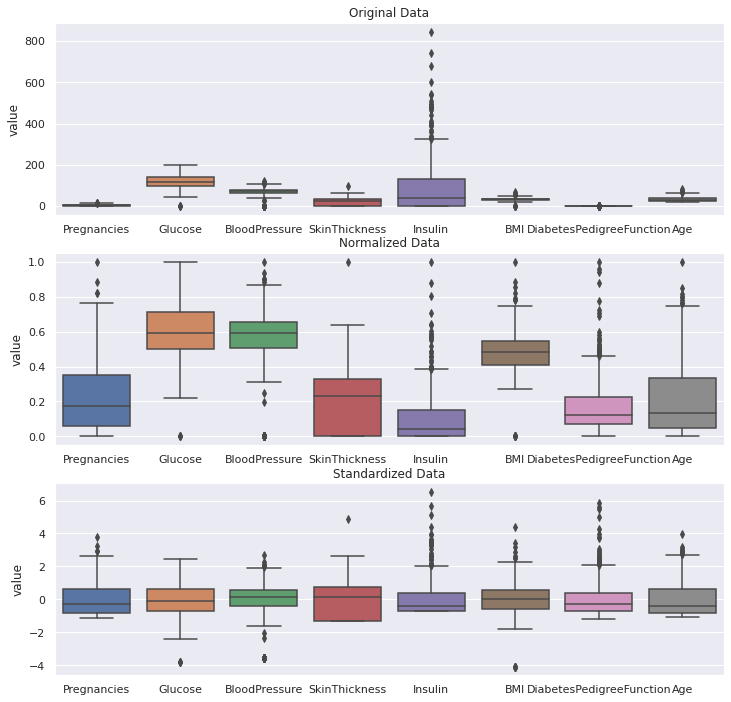

In [64]:
fig, axes = plt.subplots(3, 1, figsize=(12,12))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train), ax=axes[0]).set(
    title='Original Data', xlabel='')
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_norm), ax=axes[1]).set(
    title='Normalized Data', xlabel='')
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_std), ax=axes[2]).set(
    title='Standardized Data', xlabel='')
plt.show()

### Now the actual building, fitting and testing of a knn classifier

In [67]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
knn = KNeighborsClassifier(n_neighbors=6) 
rmse_knn = [] 
trainX = [X_train, X_train_norm, X_train_std]
testX = [X_test, X_test_norm, X_test_std]
for i in range(len(trainX)):
    knn.fit(trainX[i],y_train)
    pred = knn.predict(testX[i])
    rmse_knn.append(np.sqrt(mean_squared_error(y_test,pred)))

### Results
Please describe the results of your experiment

In [66]:
#result
df_knn = pd.DataFrame({'RMSE':rmse_knn},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,0.469871
Normalized,0.462910
Standardized,0.455842



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>2. The Iris Dataset</font> 


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/irises.png)
What is the accuracy of your new model with one epoch of training?

We are going to use the Iris Dataset, one of the standard data mining data sets which has been around since 1988.  The data set contains 3 classes of 50 instances each

1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica 

There are only 4 attributes or features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Here is an example of the data:

Sepal Length|Sepal Width|Petal Length|Petal Width|Class
:--: | :--: |:--: |:--: |:--: 
5.3|3.7|1.5|0.2|Iris-setosa
5.0|3.3|1.4|0.2|Iris-setosa
5.0|2.0|3.5|1.0|Iris-versicolor
5.9|3.0|4.2|1.5|Iris-versicolor
6.3|3.4|5.6|2.4|Iris-virginica
6.4|3.1|5.5|1.8|Iris-virginica

The job of the classifier is to determine the class of an instance (the type of Iris) based on the values of the attributes.

The dataset is available at

    https://raw.githubusercontent.com/zacharski/ml-class/master/data/irisTrain.csv
    
When you divide into training and test sets please use `random_state=0` so we can compare results. 

You should include a short paragraph describing your results.

### Importing the Necessary modules

In [31]:
import numpy as np                                    # Module for array manipulation
import seaborn as sns                                 # Importing the sns library for plotting the graph
import pandas as pd                                   # Module for reading the csv file and store the file as dataframe.
import matplotlib.pyplot as plt                       # Module for plotting the graph
from sklearn.model_selection import train_test_split  # Importing the scikit learn library for using the machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier    # Importing the KNN classifier

### Reading the dataset file

In [32]:
iris = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/irisTrain.csv')  # Reading the dataset file
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.4,3.7,1.5,0.2,Iris-setosa
1,4.8,3.4,1.6,0.2,Iris-setosa
2,4.8,3.0,1.4,0.1,Iris-setosa
3,4.3,3.0,1.1,0.1,Iris-setosa
4,5.8,4.0,1.2,0.2,Iris-setosa


In [33]:
iris.describe()       # Some basic statistical analysis about the data

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,120.000000,120.000000,120.000000,120.000000
mean,5.843333,3.057500,3.732500,1.195000
std,0.795020,0.448838,1.741252,0.759904
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing the dataset 

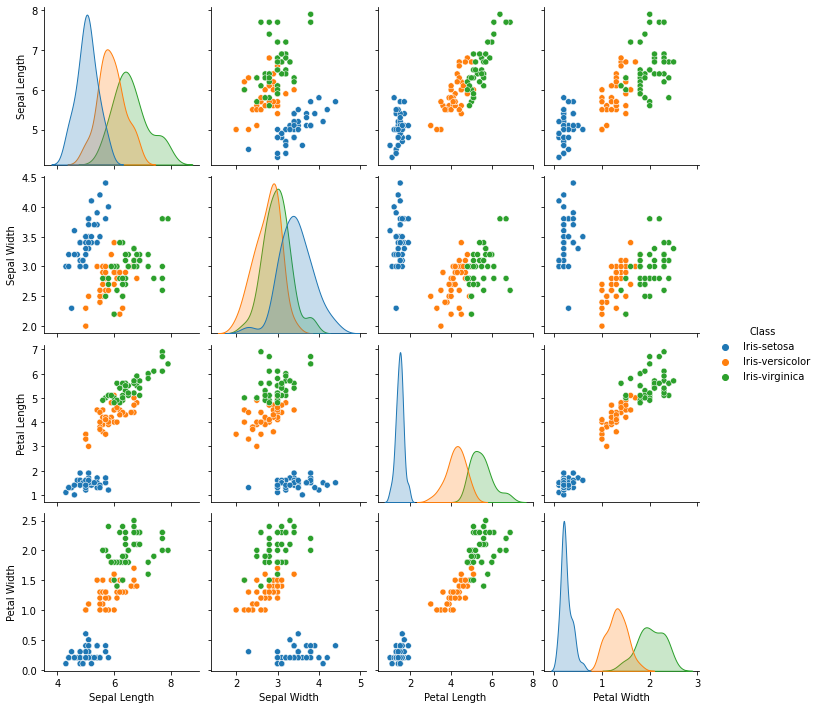

In [34]:
sns.pairplot(iris, hue='Class')   # Visualize the whole dataset as pairplot

### Deviding the dataset as non-target and target part

In [35]:
data = iris.values         # Separate features and target
X = data[:,0:4]
Y = data[:,4]

In [36]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']           # Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

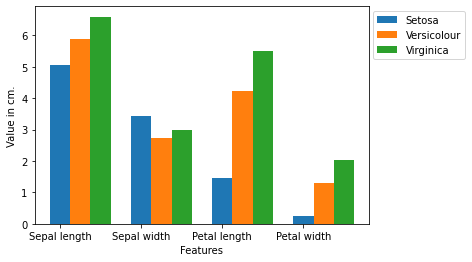

In [37]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')                      # Plot the average as barplot 
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

### Splitting the dataset into the Training and Testing part.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)       # Split the data to train and test dataset.


### Calling the Knn classifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)         # create a knn, k = 5

In [25]:
knn.fit(X_train, y_train);                        # fit to the train set

### Training the Model

In [39]:
ytrain_pred = knn.predict(X_train)              # predict on train set
ytest_pred = knn.predict(X_test)                # predict on test set

### Testing the model

In [30]:
acc_train = (y_train == ytrain_pred).mean()
acc_test = (y_test == ytest_pred).mean()            # Checking the accuracy
print(f"Train set: {acc_train}")
print(f"Test set: {acc_test}")

Train set: 0.9791666666666666
Test set: 0.9583333333333334


### Printing the Report 

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))          # A detailed classification report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.75      1.00      0.86         3

       accuracy                           0.96        24
      macro avg       0.92      0.96      0.93        24
   weighted avg       0.97      0.96      0.96        24



### Finally classify the class and printing 

In [21]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = svn.predict(X_new)                                 #Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)